In [22]:
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

plt.style.use(
    "https://raw.githubusercontent.com/sheamusfitz/mpl-styles/main/smallfigs.mplstyle")

def autocor(sig):
    return(
      signal.correlate(sig, sig, mode='full')[len(sig)-1:] /
      np.arange(len(sig)+1,1,-1)
    )

In [191]:
series_len = 100000
g1 = np.random.normal(0, 1, series_len)
g2 = np.random.normal(0, 1, series_len)
r1 = np.zeros(series_len)
r1[0] = np.random.normal(0,1)
r2 = np.zeros(series_len)
r2[0] = np.random.normal(0,1)

tau1 = 150
_a = np.exp(-1/tau1)
_b = (1-np.exp(-2/tau1))**0.5
for i in range(1, series_len):
    r1[i] = _a*r1[i-1] + _b*g1[i]
    
tau2 = 1000
_a = np.exp(-1/tau2)
_b = (1-np.exp(-2/tau2))**0.5
for i in range(1, series_len):
    r2[i] = _a*r2[i-1] + _b*g2[i]
    
r = r1+r2

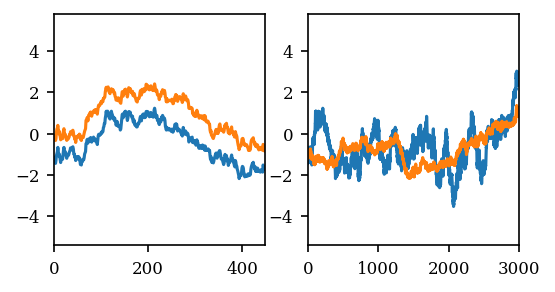

In [192]:
plt.figure(figsize=(4,2))
plt.subplot(121)
plt.plot(r)
plt.plot(r1)
plt.xlim(0, tau1*3)
plt.subplot(122)
plt.plot(r)
plt.plot(r2)
plt.xlim(0, tau2*3)
plt.show()

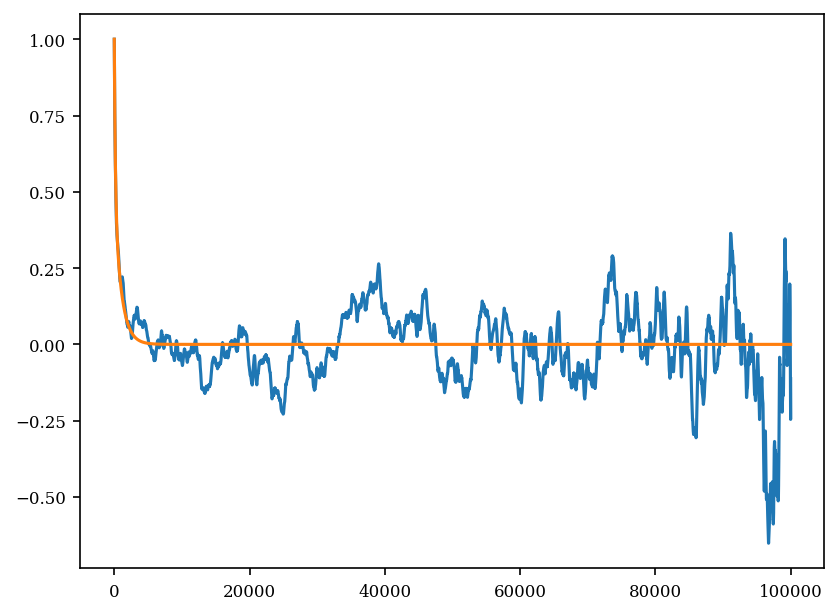

In [193]:
acor = autocor(r)
plt.plot(acor/acor[0])
f1 = np.exp(-np.arange(series_len)/tau1)
f2 = np.exp(-np.arange(series_len)/tau2)
plt.plot((f1+f2)/2)
# plt.xlim(np.array([-0.05,1])*tau1*5)
# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(1e-3, 10)

(-0.2, 2.0)

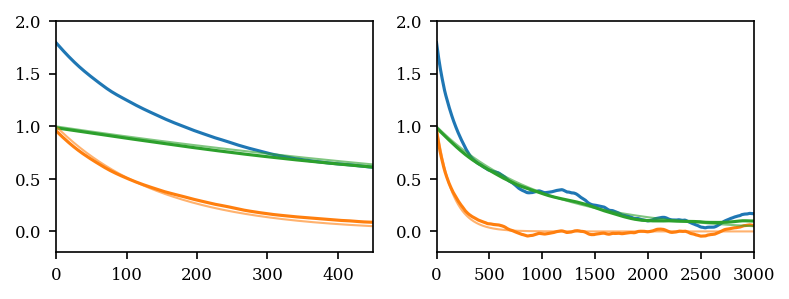

In [196]:
plt.figure(figsize=(6,2))
plt.subplot(121)
plt.plot(autocor(r))
plt.plot(autocor(r1), c='C1')
plt.plot(autocor(r2), c='C2')
plt.plot(f1, c='C1', linewidth=1, alpha = 0.6)
plt.plot(f2, c='C2', linewidth=1, alpha = 0.6)
plt.xlim(0,tau1*3)
plt.ylim(-0.2, 2)

plt.subplot(122)
plt.plot(autocor(r))
plt.plot(autocor(r1), c='C1')
plt.plot(autocor(r2), c='C2')
plt.plot(f1, c='C1', linewidth=1, alpha = 0.6)
plt.plot(f2, c='C2', linewidth=1, alpha = 0.6)
plt.xlim(0,tau2*3)
plt.ylim(-0.2, 2)

In [198]:
np.save('series_1', r1)
np.save('series_2', r2)
# np.save('series_3', r)

In [199]:
np.save('autocor_1', autocor(r1))